# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Cared Nicolle Castaños Manjarrez

- ID: A01742620

- My carreer: B.S. in Computer Science and Technology / Ingeniería en Tecnologías Computacionales


# Importing libraries

In [87]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots
from sklearn.cluster import KMeans

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


# PART 1
# Use your assigned dataset

## A1 Load data

In [2]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/TC1002S/NotebooksStudents/A01742620"

else:
    # Define path del proyecto
    Ruta            = ""

# Dataset url
url = "/content/drive/My Drive/TC1002S/Evidencia/A01742620_X.csv"

# Load the dataset
df  = pd.read_csv(url)


Mounted at /content/drive


## A2 Data managment


Print the first 7 rows

In [12]:
df.head(7)

,Unnamed: 0,x1,x2,x3
0,0,5.390101,5.020217,-5.451048
1,1,5.106728,5.779024,-7.319965
2,2,2.435537,4.140063,-8.630282
3,3,6.065458,8.492952,-5.663692
4,4,3.190074,6.684343,-6.389264
5,5,2.839789,7.990131,9.208209
6,6,4.412384,9.158358,6.071995


Print the last 4 rows

In [5]:
df.tail(4)

,Unnamed: 0,x1,x2,x3
287,287,7.811786,7.503221,8.783228
288,288,-0.422696,8.405850,-6.916065
289,289,6.081061,7.314155,-5.448137
290,290,2.482199,6.357143,-6.045421


How many rows and columns are in your data?

Use the `shape` method


In [7]:
df.shape

(291, 4)

Print the name of all columns

Use the `columns` method

In [8]:
df.columns

Index(['Unnamed: 0', 'x1', 'x2', 'x3'], dtype='object')

What is the data type in each column

Use the `dtypes` method

In [9]:
df.dtypes

Unnamed: 0      int64
x1            float64
x2            float64
x3            float64
dtype: object

What is the meaning of rows and columns?

In [ ]:
# Your responses here

#Columns: They can be interpreted to represent specific measurements of different things in an observation/instance (row)

# Unnamed column) Although no information is given, as with the other columns, this can be interpret as being merely an ID,
# or a way to tag them numerically in order, since the numbers go from 0 to 290 in order for each row

# 1) Not enough information is given to interpret what this column represents, but the values here are numerical. However, no description is given
# and no measurement unit is given either

# 2) Not enough information is given to interpret what this column represents, but the values here are numerical. However, no description is given
# and no measurement unit is given either

# 3) Not enough information is given to interpret what this column represents, but the values here are numerical. However, no description is given
# and no measurement unit is given either

#Rows: They can be interpreted to represent a specific instance or observation of a phenomenom, with each individual column being a measurement made to this instance/observation
#...

Print a statistical summary of your columns


In [10]:
df.describe()

,Unnamed: 0,x1,x2,x3
count,291.000000,291.000000,291.000000,291.000000
mean,145.000000,4.389270,7.070313,0.150090
std,84.148678,2.106009,2.255579,5.885689
min,0.000000,-0.944259,1.867491,-11.354063
25%,72.500000,2.830339,5.602916,-5.404494
50%,145.000000,4.430400,7.019557,1.788793
75%,217.500000,5.743636,8.468297,5.723606
max,290.000000,9.883645,14.129119,9.915528


In [ ]:
# 1) What is the minumum and maximum values of each variable
#x1: The maximum is 9.883645 and the minimum is -0.944259
#x2: The maximum is 14.129119 and the minimum is 1.867491
#x3: The maximum is 9.915528 and the minimum is -11.354063
#And, although the unnamed column is probably just a way to tag numerically each row
#Unnamed column: The maximum is 290 and the minimum is 0

# 2) What is the mean and standar deviation of each variable
#x1: The mean is 4.389270 and the standar deviation is 2.106009
#x2: The mean is 7.070313 and the standar deviation is 2.255579
#x3: The mean is 0.150090 and the standar deviation is 5.885689
#And, although the unnamed column is probably just a way to tag numerically each row
#Unnamed column: The mean is 145 and the standar deviation is 84.148678

# 3) What the 25%, 50% and 75% represent?
#The 25% represents that 25% of all data in that column falls under that number or is the same,
# the 50% represents that 50% of all data in that column falls under that number or is the same
# and the 75% represents that 75% of all data in that column falls under that number or is the same
# Therefore, in the x1 column, 25% of the data is equal to or lower than 2.830339, 50% of the data is equal to or lower than 4.430400 and 75% of the data
# is equal to or lower than 5.743636, and so on for all columns



Rename the columns using the same name with capital letters

In [14]:
df = df.rename(columns={"x1": "X1","x2": "X2","x3": "X3"})

df.head()

,Unnamed: 0,X1,X2,X3
0,0,5.390101,5.020217,-5.451048
1,1,5.106728,5.779024,-7.319965
2,2,2.435537,4.140063,-8.630282
3,3,6.065458,8.492952,-5.663692
4,4,3.190074,6.684343,-6.389264


Rename the columns to their original names

In [15]:
df = df.rename(columns={"X1": "x1","X2": "x2","X3": "x3"})

df.head()

,Unnamed: 0,x1,x2,x3
0,0,5.390101,5.020217,-5.451048
1,1,5.106728,5.779024,-7.319965
2,2,2.435537,4.140063,-8.630282
3,3,6.065458,8.492952,-5.663692
4,4,3.190074,6.684343,-6.389264


Use two different alternatives to get one of the columns

In [16]:
df.iloc[:, 1]

0      5.390101
1      5.106728
2      2.435537
3      6.065458
4      3.190074
         ...   
286    2.235736
287    7.811786
288   -0.422696
289    6.081061
290    2.482199
Name: x1, Length: 291, dtype: float64

In [18]:
df[["x1"]]

,x1
0,5.390101
1,5.106728
2,2.435537
3,6.065458
4,3.190074
...,...
286,2.235736
287,7.811786
288,-0.422696
289,6.081061


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [25]:
df.loc[62:72, ["x1", "x2"]]

,x1,x2
62,3.272942,6.521057
63,4.492361,9.697394
64,1.527596,8.013138
65,5.102283,11.685785
66,0.788322,5.876504
67,6.292436,6.215880
68,5.448230,10.125441
69,1.801531,11.188902
70,0.343846,7.923293
71,4.943634,5.259754


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [37]:
print("Null values in the second and third columns:\n")
print(df.iloc[:,[1,2]].isnull().sum())
print("\nNot null values in the second and third columns:\n")
print(df.iloc[:,[1,2]].notnull().sum())
print("\nSum of null and not null values in the second and third columns:\n")
print(df.iloc[:,[1,2]].notnull().sum()+df.iloc[:,[1,2]].isnull().sum())
print("\nSum of total values in a column:\n")
print(df.shape[0])

Null values in the second and third columns:

x1    0
x2    0
dtype: int64

Not null values in the second and third columns:

x1    291
x2    291
dtype: int64

Sum of null and not null values in the second and third columns:

x1    291
x2    291
dtype: int64

Sum of total values in a column:

291


Discard the last column


In [38]:
df.drop("x3", axis=1, inplace = True)
df

,Unnamed: 0,x1,x2
0,0,5.390101,5.020217
1,1,5.106728,5.779024
2,2,2.435537,4.140063
3,3,6.065458,8.492952
4,4,3.190074,6.684343
...,...,...,...
286,286,2.235736,8.658801
287,287,7.811786,7.503221
288,288,-0.422696,8.405850
289,289,6.081061,7.314155


### Questions

Based on the previos results, provide a description of yout dataset

Your response: My dataset originally had 4 columns and 291 rows. The first column, which is unnamed, seems to label each row in numerical order, and the rest of the columns seem to be measurements, although it is uncertain as to what they're measuring or even in what units it is being measured, as there are no descriptions for them.

The rows seem to represent a specific instance or observation that is being measured (with every column being a specific measurement).

All columns have numerical values in them, but their data types seem to be different (with the first, unnamed column being int and the rest float, since the first column only has whole numbers, while the rest have decimals).

As for the statistical summary of the columns

 **1) What is the minumum and maximum values of each variable**

x1: The maximum is 9.883645 and the minimum is -0.944259

x2: The maximum is 14.129119 and the minimum is 1.867491

x3: The maximum is 9.915528 and the minimum is -11.354063
And, although the unnamed column is probably just a way to tag numerically each row
Unnamed column: The maximum is 290 and the minimum is 0


 **2) What is the mean and standar deviation of each variable**

x1: The mean is 4.389270 and the standar deviation is 2.106009

x2: The mean is 7.070313 and the standar deviation is 2.255579

x3: The mean is 0.150090 and the standar deviation is 5.885689

And, although the unnamed column is probably just a way to tag numerically each row
Unnamed column: The mean is 145 and the standar deviation is 84.148678

 **3) What the 25%, 50% and 75% represent?**

The 25% represents that 25% of all data in that column falls under that number or is the same, the 50% represents that 50% of all data in that column falls under that number or is the same and the 75% represents that 75% of all data in that column falls under that number or is the same.

Therefore, in the x1 column, 25% of the data is equal to or lower than 2.830339, 50% of the data is equal to or lower than 4.430400 and 75% of the data is equal to or lower than 5.743636, and so on for all columns







## A3 Data visualization

In [39]:
#First, I'll load the original dataset again, so I have all the columns
df  = pd.read_csv(url)
df.head()

,Unnamed: 0,x1,x2,x3
0,0,5.390101,5.020217,-5.451048
1,1,5.106728,5.779024,-7.319965
2,2,2.435537,4.140063,-8.630282
3,3,6.065458,8.492952,-5.663692
4,4,3.190074,6.684343,-6.389264


Plot in the same figure the histogram of two variables



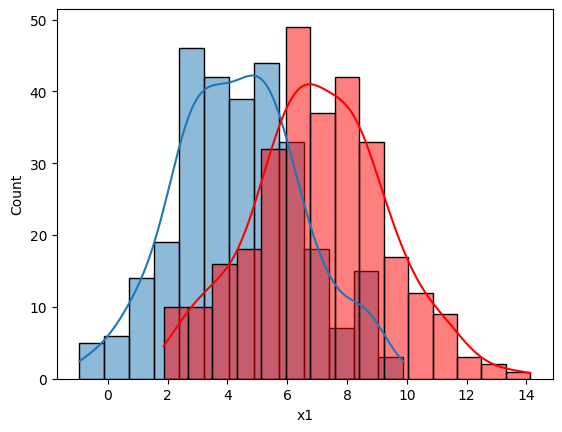

In [55]:
sns.histplot(df.x1, kde=True)
sns.histplot(df.x2, kde=True,color='r')

plt.show()

Based on these plots, provide a description of your data:

Your response here: Both the columns x1 and x2 have a normal distribution. However, the values in x2 tend to be higher, with the lowest value being higher than x1's lowest value.

Plot in the same figure the boxplot of two variables

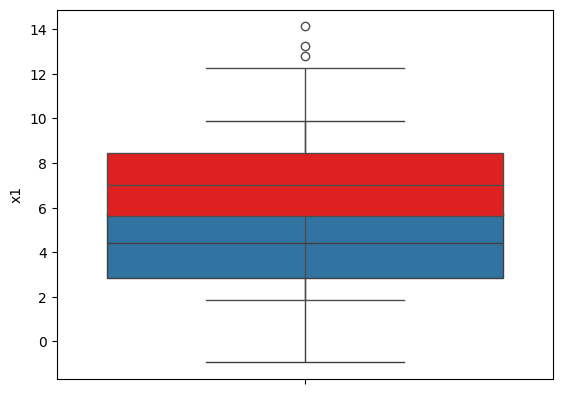

In [62]:
sns.boxplot(df["x1"])
sns.boxplot(df["x2"],color='r')
plt.show()

Plot the scatter plot of two variables

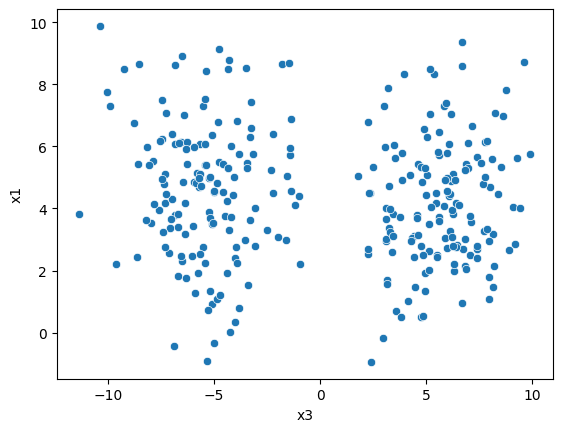

In [50]:
sns.scatterplot(data=df, y="x1", x="x3")
plt.show()

### Questions

Based on the previos plots, provide a description of yout dataset

Your response: The boxplot, being between x1 and x2, shows that they have normal distributions, as both of the two middles of the interquartile range seems to be equal or almost equal. Again, this graphic shows that the values in x2 tend to be higher than in x1.

The scatter plot, that is between x1 and x3, shows two groups of points that are separeted from each other and distinct, therefore, suggesting that there are two cluster in the data.

As a bonus, no data seems to have the value of 0 in the x3 column, since no points are located there, and in a few of the surronding values. This is the area that seems to divide the two groups of points in this scatter plot.




## A4 Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plot

In [93]:
#The unnamed column will be eliminated as to not affect results, being merely a way to tag numerically each row
df=df[["x1", "x2","x3"]]

#The scatter plot between x1 and x3 showed two groups, therefore:
K  = 2


km = KMeans(n_clusters=K, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster)
yestimated = km.fit_predict(df)
#yestimated = km.fit_predict(df[['x1','x2']] )
#yestimated = km.fit_predict(df[['x1','x3']] )

# Print estimated cluster of each point in the dataset
yestimated

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1], dtype=int32)

Add to your dataset a column with the estimated cluster to each data point

In [95]:
df['yestimated'] = yestimated

df

,x1,x2,x3,yestimated
0,5.390101,5.020217,-5.451048,1
1,5.106728,5.779024,-7.319965,1
2,2.435537,4.140063,-8.630282,1
3,6.065458,8.492952,-5.663692,1
4,3.190074,6.684343,-6.389264,1
...,...,...,...,...
286,2.235736,8.658801,-3.920572,1
287,7.811786,7.503221,8.783228,0
288,-0.422696,8.405850,-6.916065,1
289,6.081061,7.314155,-5.448137,1


Print the number associated to each cluster

In [96]:
# Print the Labels/Names of the existing clusters
df.yestimated.unique()

array([1, 0], dtype=int32)

Print the centroids

In [97]:
# Cluster centroides
km.cluster_centers_

array([[ 4.15549436,  7.89977957,  5.66425113],
       [ 4.6246573 ,  6.23512529, -5.40210041]])

Print the intertia metric

In [98]:
# Sum of squared error (sse) of the final model
print(km.inertia_)
# The number of iterations required to converge
print(km.n_iter_)

3680.8625643609566
2


Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

Number of points in clusters 0: 146
Number of points in clusters 1: 145
Total Number of points in the clusters: 291


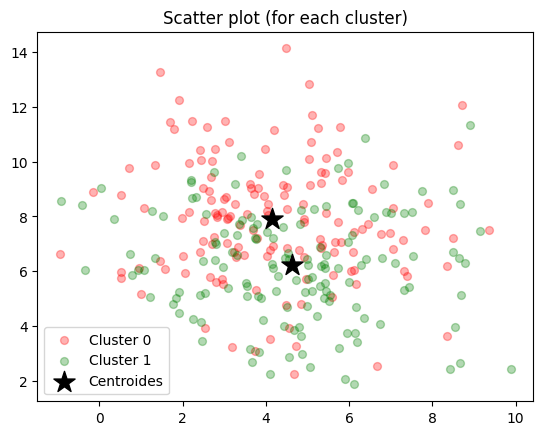

In [99]:
# Get a dataframe with the data of each clsuter
df0 = df[df.yestimated==0]
df1 = df[df.yestimated==1]

# Number of points in cluster 0
NpointsCluster0 = df0.shape[0]
NpointsCluster1 = df1.shape[0]

# Print
print("Number of points in clusters 0: " + str(NpointsCluster0) )
print("Number of points in clusters 1: " + str(NpointsCluster1) )

# Print total number of points
print("Total Number of points in the clusters: " + str(NpointsCluster0+NpointsCluster1) )

# Get a dataframe with the data of each clsuter
df1 = df[df.yestimated==0]
df2 = df[df.yestimated==1]

# Scatter plot of each cluster
plt.scatter(df1.x1, df1.x2, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df2.x1, df2.x2, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)

# Plot centrodides
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Scatter plot (for each cluster)')
#plt.xlabel('x1')
#plt.ylabel('x2')
plt.legend()
plt.show()

### Questions

Provides a detailed description of your results

Your response: The Kmeans method was made using only the values of the x1, x2 and x3 columns, as the first unnamed column would not make sense, since it's only a numerical tag for each row.

Since the scatter plot made previously in the last section showed two groups of points, the number of clusters that was considered for the Kmeans method was two.

Each point was then calculated into one of the two clusters, depending on proximity, and that's what is then plotted into the last scatter plot between x1 and x2, with each point being colored depending on the cluster it depends to, and with the cluster centroids being marked by stars.

This last scatter plot shows that not all combinations of scatter plots between the three columns (x1, x2, and x3) have such a distinction between the two clusters, as it's possible to see that many points cross into the "region" of the other cluster, and both clusters are pretty mixed together.

## A5 Elbow plot

Compute the Elbow plot

In [101]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(df[['x1','x2']])
    # Save sse for each k
    sse.append(km.inertia_)


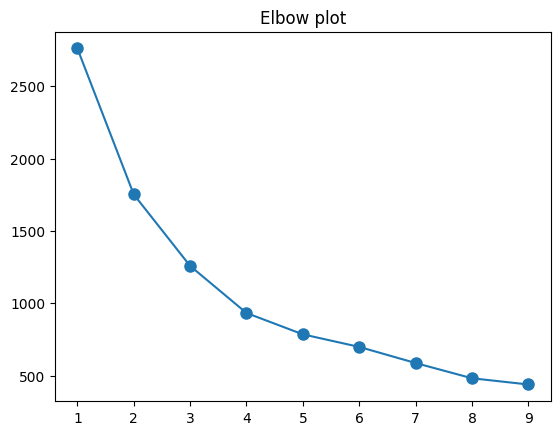

In [104]:
# Plot sse versus k
plt.plot(k_rng,sse, 'o-', markersize=8)

plt.title('Elbow plot')
#plt.xlabel('K')
#plt.ylabel('Sum of squared error')
plt.show()

### Questions

What is the best number of clusters K? (argue your response)

Your response: Looking at the elbow plot that was done in this section, it can be seen that at k=8, the sum of squared error decreases significantly, being at around 500. Therefore, the best could be k=8, but k=9 could also be selected, as the sum decreases even more, although not much when compared to k=8, so I think k=8 suffices and is the best option.


Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)

Your response: Not at all, since in the last section where I implemented the Kmeans method to make the clusters and their centroids, I only considered two clusters, due to the fact that the scatter plot between x1 and x3 showed two groups of points, therefore, I computed the answer with two clusters.

However, after seeing the elbow plot plotted in this section, the ideal number of clusters seems to be 8, for the reasons stated in the last question.



# PART 2
# Descipcion de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta: Durante esta semana trabajé mucho con esta competencia, debido a que se estuvo trabajando con diversos datos, aprendiendo sobre métodos que justamente sirven para construir modelos que nos ayuden a entender como los datos se relacionan entre sí y como nos podrían ayudar a entender el fenómeno investigado y a intentar predecirlo, mediante el uso de estos mismos métodos como los que se usaron en este Notebook.

Además, para poder aprender a realizar estos modelos, se nos enseñó y se llevó a la práctica durante los ejercicios y este entregable primero a tomar en cuenta los datos, aprender a entenderlos e interpretarlos para realmente entender tanto el fenómeno que se está estudiando como lo que los datos representan, para así entender lo que las tablas que se hagan con los datos nos dicen, y que sugieren la manera en que los datos interactúan entre sí.

Debido a esto, el nivel de competencia que se logró adquirir durante la semana es alto.

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta: Como se mencionó en la pregunta anterior, esta subcompetencia también se trabajó mucho durante la semana, debido a que los análisis que se les hacían a los datos dados durante los ejercicios y este entregables nos servían justamente para constuir los modelos que nos servían para entender mejor el fenómeno que se estudiaba y tomaba en cuenta para los datos, y para predecir cuáles serían los resultados de otra observación si ya se tiene un dato que se haya estudiado en el modelo con anterioridad.

Debido a esto, el nivel de logro de esta subcompetencia también logró ser alto.